In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path=Path('../input/dogs-vs-cats/')
path.ls()

[PosixPath('../input/dogs-vs-cats/train')]

In [3]:
data=ImageDataBunch.from_folder(path,valid_pct=0.2,ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (14771 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Dog,Dog,Dog,Dog,Dog
Path: ../input/dogs-vs-cats;

Valid: LabelList (3692 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Cat,Cat,Cat,Cat,Cat
Path: ../input/dogs-vs-cats;

Test: None

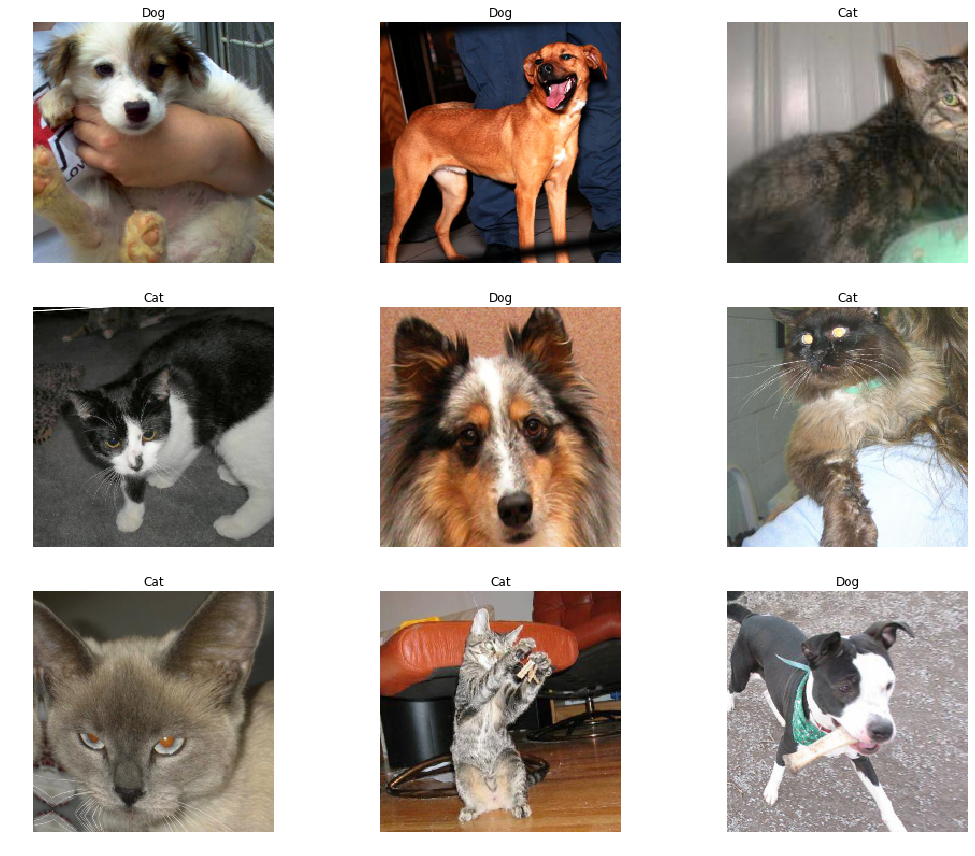

In [4]:
data.show_batch(3,figsize=(15,12))

In [5]:
learn=cnn_learner(data,models.resnet50,metrics=[accuracy,error_rate],model_dir='/kaggle/working')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [6]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


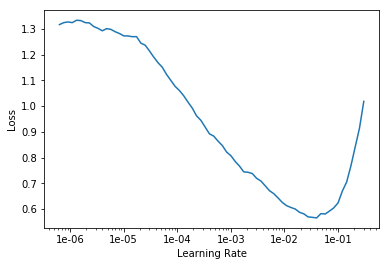

In [7]:
learn.recorder.plot()

In [9]:
lr=1e-3
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.102228,0.080571,0.984020,0.015980,03:24
1,0.076105,0.050103,0.987541,0.012459,03:13
2,0.047236,0.040011,0.987812,0.012189,03:11
3,0.050794,0.040921,0.989166,0.010834,03:08
4,0.035413,0.035813,0.989978,0.010022,03:07


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)